<a href="https://colab.research.google.com/github/hansjang/Py_Radar/blob/main/%EB%8D%B0%EC%8B%B8%EB%9D%BC%EB%A9%B4Part4_P117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install imbalanced-learn

In [7]:
# 필요한 모듈 설치
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# 샘플 데이터 생성
x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
print(Counter(y))

Counter({0: 1900, 1: 100})


In [8]:
# Random Under Sampling : sampling_strategy='majority'
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 100, 1: 100})


In [9]:
# Random Under Sampling : sampling_strategy=0.5
undersample = RandomUnderSampler(sampling_strategy=0.5)
x_under2, y_under2 = undersample.fit_resample(x, y)
print(Counter(y_under2))

Counter({0: 200, 1: 100})


In [10]:
# Random Over Sampling : sampling_strategy = 0.5
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 0.5)
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 950})


In [12]:
# Random Over Sampling : sampling_strategy = 'minority'
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 'minority')
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({1: 1900, 0: 1900})


In [13]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))

Counter({1: 1900, 0: 1900})


Text(0.5, 1.0, 'SMOTE')

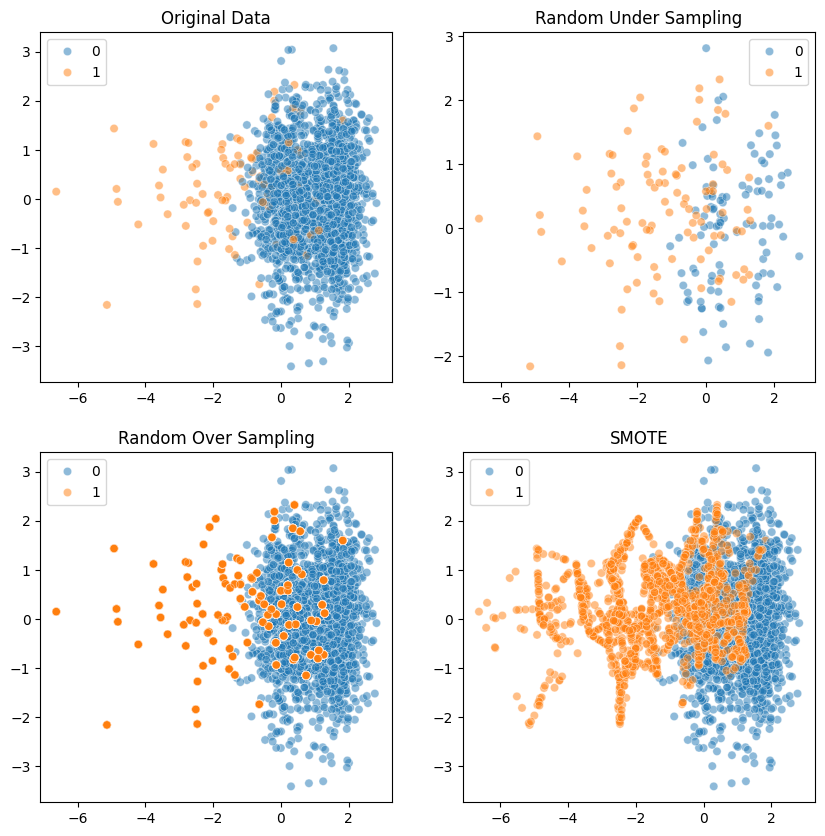

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
sns.scatterplot(x = x[:, 1], y = x[:, 2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x = x_under[:, 1], y = x_under[:, 2], hue=y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x = x_over[:, 1], y = x_over[:, 2], hue=y_over, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x = x_sm[:, 1], y = x_sm[:, 2], hue=y_sm, ax=axes[1][1], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[1][0].set_title('Random Over Sampling')
axes[1][1].set_title('SMOTE')
